# Analisando Base de Dados sobre a saída de funcionários

## Importando bibliotecas

In [2]:
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## Lendo a base de dados

In [3]:
df = pd.read_csv("test.csv")
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


## Analisando as informações das colunas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years at Company          14900 non-null  int64 
 4   Job Role                  14900 non-null  object
 5   Monthly Income            14900 non-null  int64 
 6   Work-Life Balance         14900 non-null  object
 7   Job Satisfaction          14900 non-null  object
 8   Performance Rating        14900 non-null  object
 9   Number of Promotions      14900 non-null  int64 
 10  Overtime                  14900 non-null  object
 11  Distance from Home        14900 non-null  int64 
 12  Education Level           14900 non-null  object
 13  Marital Status            14900 non-null  object
 14  Number of Dependents  

## Analisando a porcentagem dos funcionários que saíram com base no números de promoções recebidas

<Axes: xlabel='Number of Promotions', ylabel='Porcentagem'>

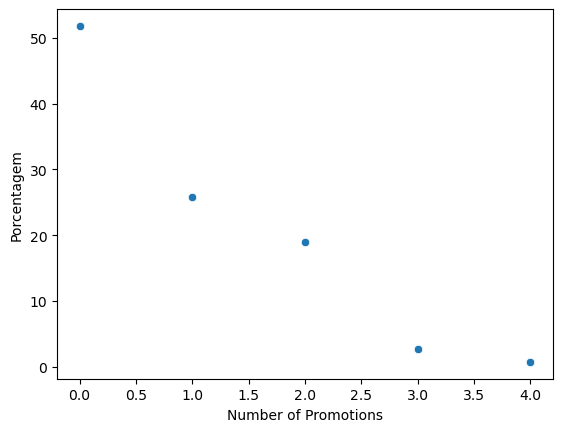

In [21]:
funcionariosSairamComBasePromoções = df.loc[df["Attrition"] == "Left"] #Filtrando os dados só de quem saiu
funcionariosSairamComBasePromoções = funcionariosSairamComBasePromoções[["Attrition", "Number of Promotions", "Company Size"]].groupby(["Attrition", "Number of Promotions"]).count()
total = funcionariosSairamComBasePromoções["Company Size"].sum() # estou pegando o total de pessoas que sairam da empresa
funcionariosSairamComBasePromoções["Porcentagem"] = round((funcionariosSairamComBasePromoções["Company Size"] / total) * 100, 2) #Craindo uma coluna com a porcentagem de cada situação

sns.scatterplot(funcionariosSairamComBasePromoções, x = "Number of Promotions", y = "Porcentagem")

Analisando o perfil dos funcionarios que sairam da empresa, vemos que quanto menos promoções eles recebem, maior a porcentagem de saída da empresa, o que pode nos levar a pensar que quantidade de promoções é muito importante para a rentenção dos funcionários na empresa e pode servir como uma estratégia para diminuir o turnover!

# Analisando a porcentagem dos funcinários que sairam da empresa com base no seu recohecimento na própria

In [6]:
funcionariosSairamReconhecimentoEmpresarial = df.loc[df["Attrition"] == "Left"] #Filtrando os dados só de quem saiu
funcionariosSairamReconhecimentoEmpresarial = funcionariosSairamReconhecimentoEmpresarial[["Employee Recognition", "Company Size"]].groupby(["Employee Recognition"]).count().sort_values(by="Company Size", ascending=False).reset_index()
total = funcionariosSairamReconhecimentoEmpresarial["Company Size"].sum()
funcionariosSairamReconhecimentoEmpresarial["Porcentagem"] = round((funcionariosSairamReconhecimentoEmpresarial["Company Size"] / total) * 100, 2) #Criando uma coluna com a porcentagem de cada situação
graficoPorcentagem = px.pie(funcionariosSairamReconhecimentoEmpresarial, names="Employee Recognition", values= "Porcentagem")
graficoPorcentagem.update_layout(width=600, height=400)
graficoPorcentagem

A partir dessa anlálise, vemos que quanto menor o reconhecimento na empresa, maiores são as chances dele sair da empresa. Logo, vemos que estratégias de reconhecimento são necessárias para a permanência na empresa!

## Analisando os dados de todos os funcionários com base no seu nivel na empresa

<Axes: xlabel='Job Level', ylabel='Porcentagem'>

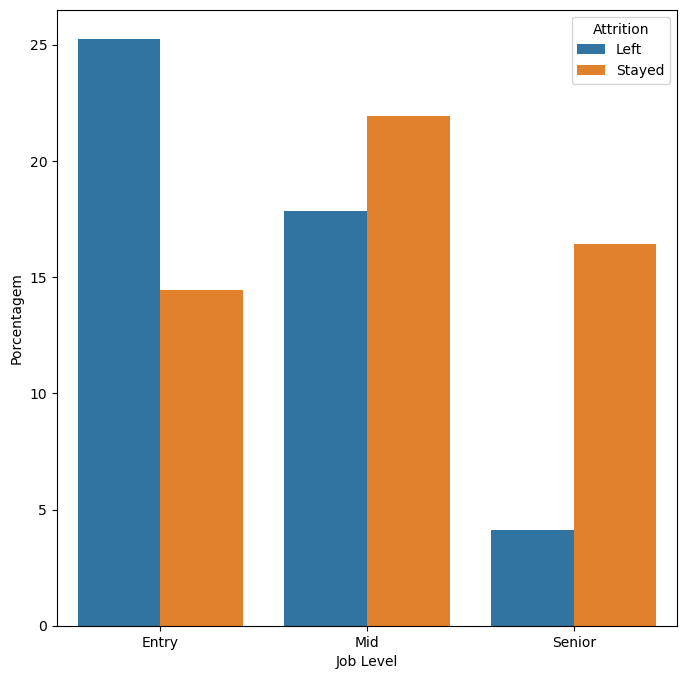

In [15]:

funcionariosSairamFicaramNivelEmprego = df[["Attrition", "Job Level", "Company Size"]].groupby(["Attrition", "Job Level"]).count().reset_index()
total = funcionariosSairamFicaramNivelEmprego["Company Size"].sum()
funcionariosSairamFicaramNivelEmprego["Porcentagem"] = round((funcionariosSairamFicaramNivelEmprego["Company Size"] / total) * 100, 2)

plt.figure(figsize=[8, 8])
sns.barplot(funcionariosSairamFicaramNivelEmprego, x="Job Level", y = "Porcentagem", hue = "Attrition")

Vemos aqui, que quanto menor o nível de trabalho , maiores as chances do funcionarios sairem(parte azul), e na parte laranja. nos mostra que as pessoas que ficam tem uma tendência a terem niveis mais altos(Mid/Senior). O que nos leva a pensar que os funcionários de com menores níveis não tem uma valorização muito grande, o que fazem eles saírem facilmente! Vamos fazer uma próxima analise para termos uma confirmação!

In [8]:
funcionariosSairamFicaramNivelEmprego = df[["Job Level", "Employee Recognition", "Company Size"]].groupby(["Job Level", "Employee Recognition"]).count()
total = funcionariosSairamFicaramNivelEmprego["Company Size"].sum()
funcionariosSairamFicaramNivelEmprego["Porcentagem"] = round((funcionariosSairamFicaramNivelEmprego["Company Size"] / total) * 100, 2)
funcionariosSairamFicaramNivelEmprego

Company Size  Porcentagem
Job Level Employee Recognition                           
Entry     High                          1477         9.91
          Low                           2361        15.85
          Medium                        1802        12.09
          Very High                      273         1.83
Mid       High                          1472         9.88
          Low                           2291        15.38
          Medium                        1863        12.50
          Very High                      299         2.01
Senior    High                           757         5.08
          Low                           1210         8.12
          Medium                         959         6.44
          Very High                      136         0.91

Depois dessa analise, vemos que os níveis mais iniciantes tem uma tendência maior a terem pouca valorização, o que confirma nossa analise anterior e conecta com a analise da porcentagem de funcionarios que saem com base no seu reconhecimento na empresa!

## Analisando os funcionários que saíram da empresa com base na faxetária de idade deles

In [9]:
def AgeClassifier(age): #Função que pega as idades e retorna a classificação 
    if age <= 30:
        return "young adults"
    elif age >= 31 and age <=50:
        return "middle-aged adults"
    else:
        return "older adults"

df["Age_Category"] = df["Age"].apply(AgeClassifier)#coluna criada pra analisar se a faxetaria de idade interfere na saída do funcionario


funcionariosSairamIdade = df[["Attrition", "Age_Category", "Company Size"]].groupby(["Attrition", "Age_Category"]).count() 
total = funcionariosSairamIdade["Company Size"].sum()
funcionariosSairamIdade["Porcentagem"] = round((funcionariosSairamIdade["Company Size"] / total) * 100, 2)
funcionariosSairamIdade

Company Size  Porcentagem
Attrition Age_Category                                 
Left      middle-aged adults          3256        21.85
          older adults                1417         9.51
          young adults                2359        15.83
Stayed    middle-aged adults          3824        25.66
          older adults                1799        12.07
          young adults                2245        15.07

## Analisando a Média das idades para comprovar a hipótese que os funcionarios entre 38 e 45 tem uma tendencia a sair da empresa

In [10]:
df[["Job Level", "Age"]].groupby("Job Level").mean() 

,Age
Job Level,
Entry,38.202604
Mid,38.494852
Senior,38.525800


Depois dessas duas análises, vemos que as pessoas 31-50 tendem a sair da empresa mais facilmente!